In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as nplin
import itertools

In [2]:
np.random.seed(0)

In [3]:
# fig3a: n = 20
w = np.loadtxt('w_true_hopfield_boltzmann_eps_n20l10k.txt')
w_true = w[0]
w1 = w[1]
w2 = w[2]
w3 = w[3]

In [19]:
# fig 3b: computational time
run_time = np.loadtxt('run_time.txt')
run_time = run_time[:,3:]
n = run_time[0]
t1 = run_time[1]
t2 = run_time[2]

In [47]:
t1

array([0.165266  , 0.201882  , 0.268407  , 0.359039  , 0.547939  ,
       0.66725   , 0.97050683])

In [48]:
n

array([12., 14., 16., 18., 20., 22., 24.])

In [49]:
from sklearn.linear_model import LinearRegression

In [51]:
reg = LinearRegression().fit(n.reshape(-1,1), t1.reshape(-1,1))

In [54]:
a1,b1 = reg.coef_,reg.intercept_
a1,b1

(array([[0.06474983]]), array([-0.71116983]))

In [39]:
# fig 3c: n = 100
w_n100 = np.loadtxt('w_0.dat')
w_true_n100 = w_n100[0]
w1_n100 = w_n100[1] # hopfield
w2_n100 = w_n100[2] # e-machine

In [30]:
# fig 3d: histogram
p = np.loadtxt('p_eps.txt')
bins1 = p[0,:]
p1 = p[1,:]
p1_std = p[2,:]

p = np.loadtxt('p_random.txt')
bins2 = p[0,:]
p2 = p[1,:]
p2_std = p[2,:]

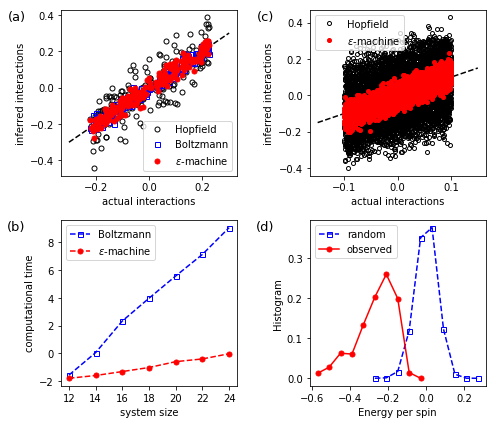

In [46]:
label = ['(a)','(c)','(b)','(d)','(c)','(g)','(d)','(h)']

nx,ny = 2,2
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*3))

ax[0,0].plot([-0.3,0.3],[-0.3,0.3],'k--')
ax[0,0].plot(w_true,w1,'ko',marker='o',mfc='none',markersize=5,label='Hopfield')
ax[0,0].plot(w_true,w2,'bs',marker='s',mfc='none',markersize=5,label='Boltzmann')
ax[0,0].plot(w_true,w3,'ro',marker='o',markersize=5,label='$\epsilon$-machine')
ax[0,0].set_xlabel('actual interactions')
ax[0,0].set_ylabel('inferred interactions')
ax[0,0].legend()

ax[1,0].plot(n,np.log(t2),'bs--',mfc='none',markersize=5,label='Boltzmann')
ax[1,0].plot(n,np.log(t1),'ro--',markersize=5,label='$\epsilon$-machine')
ax[1,0].set_xlabel('system size')
ax[1,0].set_ylabel('computational time')
ax[1,0].legend()
ax[1,0].set_xticks([12,14,16,18,20,22,24])

ax[0,1].plot([-0.15,0.15],[-0.15,0.15],'k--')
ax[0,1].plot(w_true_n100,w1_n100,'ko',marker='o',mfc='none',markersize=4,label='Hopfield')
ax[0,1].plot(w_true_n100,w2_n100,'ro',marker='o',markersize=4,label='$\epsilon$-machine')
ax[0,1].set_xlabel('actual interactions')
ax[0,1].set_ylabel('inferred interactions')
ax[0,1].legend()

ax[1,1].plot(bins2,p2,'bs--',mfc='none',markersize=5,label='random')
ax[1,1].plot(bins1,p1,'ro-',markersize=5,label='observed')
ax[1,1].set_xlabel('Energy per spin')
ax[1,1].set_ylabel('Histogram')
ax[1,1].legend()

xlabel = np.full(nfig,-0.2)
ylabel = np.full(nfig,1.)
k = 0
for i in range(ny):
    for j in range(nx):        
        ax[i,j].text(xlabel[k],ylabel[k],label[k],transform=ax[i,j].transAxes,va='top',ha='right',fontsize=13)
        k += 1

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.savefig('fig3.pdf', format='pdf', dpi=100)